In [1]:
from zipfile import ZipFile
file_path = '/content/drive/My Drive/dataset.zip'

with ZipFile(file_path,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [30]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Model

# importing models 
from tensorflow.keras.applications import VGG19


In [31]:
# re-size all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/dataset/training_set'
valid_path = '/content/dataset/test_set'

# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


# include_top = means last layers remove 

# don't train existing weights bcz it was already trained 


for layer in vgg.layers:
  layer.trainable = False

In [32]:
# our layers - you can add more if you want

x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)

prediction = Dense(1, activation='sigmoid')(x)  # final layers 

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()


Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/dataset/training_set',
        target_size=(224,224),
        batch_size=5,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/dataset/test_set',
        target_size=(224,224),
        batch_size=5,
        class_mode='binary')

r =model.fit(
        train_generator,
        
        epochs=5,

        validation_data=validation_generator

        )

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/5
1600/1600 [==============================] - 137s 86ms/step - loss: 0.3783 - accuracy: 0.8464 - val_loss: 0.2594 - val_accuracy: 0.9080
Epoch 2/5
1600/1600 [==============================] - 135s 84ms/step - loss: 0.2968 - accuracy: 0.8935 - val_loss: 0.9085 - val_accuracy: 0.7930
Epoch 3/5
1600/1600 [==============================] - 135s 84ms/step - loss: 0.3010 - accuracy: 0.9024 - val_loss: 0.3799 - val_accuracy: 0.8885
Epoch 4/5
1600/1600 [==============================] - 136s 85ms/step - loss: 0.2644 - accuracy: 0.9109 - val_loss: 0.3186 - val_accuracy: 0.9055
Epoch 5/5
1600/1600 [==============================] - 137s 86ms/step - loss: 0.2389 - accuracy: 0.9197 - val_loss: 0.2816 - val_accuracy: 0.9170


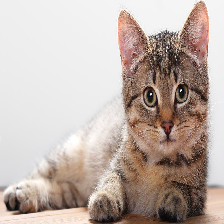

In [35]:

from tensorflow.keras.preprocessing import image
img=image.load_img('/content/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(224,224))
img

In [36]:
img_test_1=image.img_to_array(img)

In [37]:
img_test_1.shape


(224, 224, 3)

In [39]:

import numpy as np
img_test_1_exp=np.expand_dims(img_test_1, axis=0)
img_test_1_exp.shape

(1, 224, 224, 3)

In [41]:
result=model.predict(img_test_1_exp).astype('int8')
result[0][0]

0

In [42]:
# means it is cat 

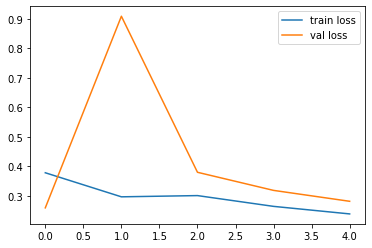

In [43]:
from matplotlib import pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

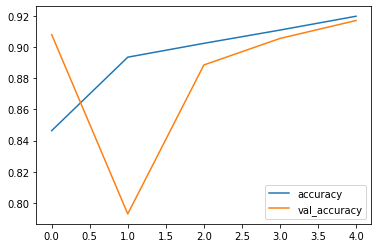

In [46]:

# accuracies
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()